In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
data= pd.read_csv("E:/Ta-seen/insurance.csv")
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


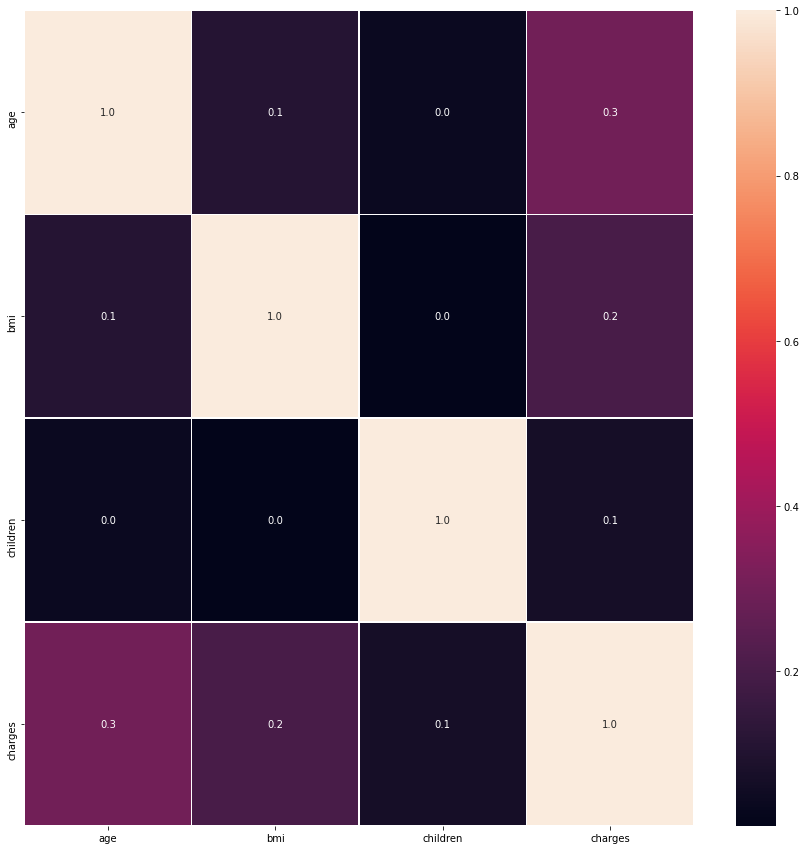

In [6]:
f,ax = plt.subplots(figsize = (15,15))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.show()

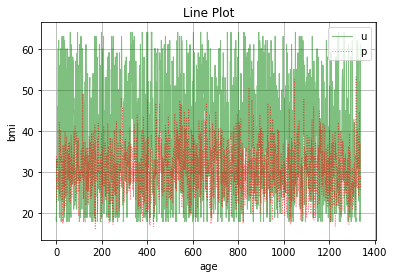

In [7]:
#Relationaship between age and bmi

data.age.plot(kind='line', color='g', label='Age', linewidth=1, alpha=0.5, grid=True, linestyle='-')
data.bmi.plot(kind='line', color='r', label='BMI', linewidth=1, alpha=0.5, grid=True, linestyle=':')
plt.legend('upper left')
plt.xlabel('age')
plt.ylabel('bmi')
plt.title('Line Plot')
plt.show()

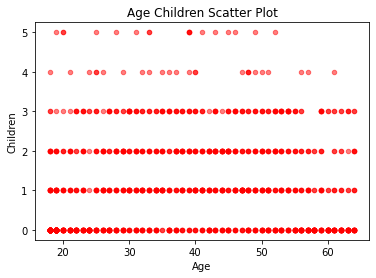

In [8]:
#Relationship between age and children scatter plot

data.plot(kind='scatter', x='age', y='children',alpha = 0.5,color = 'red')
plt.xlabel('Age')              
plt.ylabel('Children')
plt.title('Age Children Scatter Plot')  
plt.show()

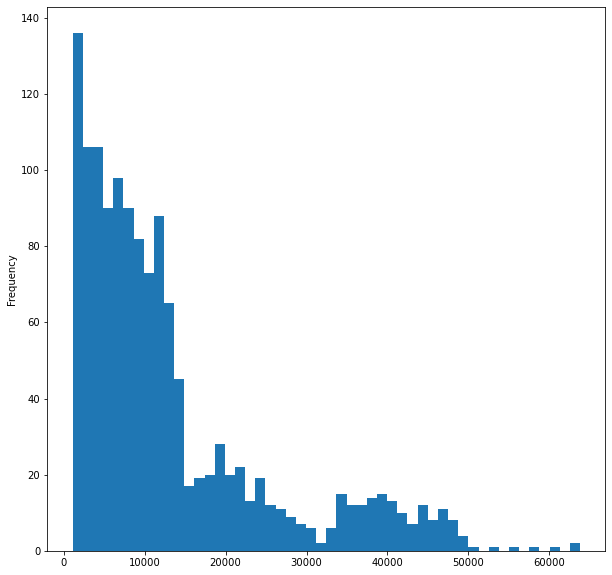

In [9]:
#Histogram

data.charges.plot(kind='hist', bins=50, figsize=(10,10))
plt.show()

In [ ]:
#Let's look female and male people.For this issue we will create frames and use some plots for visualization.

In [10]:
data1=data['sex']=='female'
data_female=data[data1]
data2=data['sex']=='male'
data_male=data[data2]

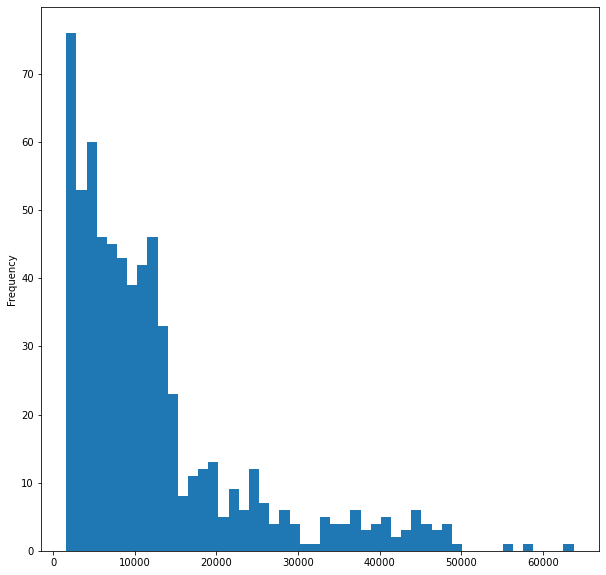

In [11]:
data_female.charges.plot(kind='hist', bins=50, figsize=(10,10))
plt.show()

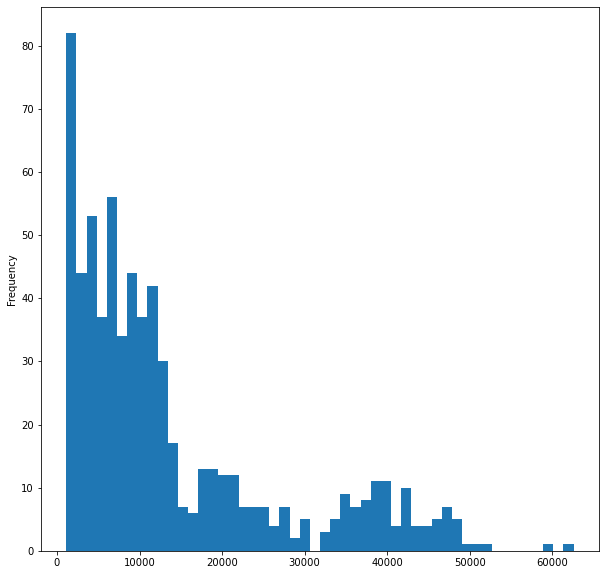

In [12]:
data_male.charges.plot(kind='hist', bins=50, figsize=(10,10))
plt.show()

In [ ]:
#We can said that female's charges less than male's charges between 20000 and 50000.

In [13]:
data4=(data['sex']=='female') & (data['smoker']=='yes') & (data['children']>0)
data[data4]

,age,sex,bmi,children,smoker,region,charges
23,34,female,31.920,1,yes,northeast,37701.87680
58,53,female,22.880,1,yes,southeast,23244.79020
84,37,female,34.800,2,yes,southwest,39836.51900
94,64,female,31.300,2,yes,southwest,47291.05500
103,61,female,29.920,3,yes,southeast,30942.19180
...,...,...,...,...,...,...,...
1218,46,female,34.600,1,yes,southwest,41661.60200
1281,47,female,27.645,2,yes,northwest,24535.69855
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545


In [ ]:
#In this data, we have 62 smoker mother. Let's look at the male.

In [14]:
data3=(data['sex']=='male') & (data['smoker']=='yes') & (data['children']>0)
data[data3]

,age,sex,bmi,children,smoker,region,charges
29,31,male,36.300,2,yes,southwest,38711.00000
34,28,male,36.400,1,yes,southwest,51194.55914
38,35,male,36.670,1,yes,northeast,39774.27630
49,36,male,35.200,1,yes,southeast,38709.17600
52,48,male,28.000,1,yes,southwest,23568.27200
...,...,...,...,...,...,...,...
1284,61,male,36.300,1,yes,southwest,47403.88000
1288,20,male,39.400,2,yes,southwest,38344.56600
1301,62,male,30.875,3,yes,northwest,46718.16325
1304,42,male,24.605,2,yes,northeast,21259.37795


In [ ]:
#Smokers fathers are more than smoker mothers.

In [15]:
average_bmi=sum(data.bmi)/len(data.bmi)
data['bmi_level']=['high' if i>average_bmi else 'low' for i in data.bmi]
data.loc[:10,["bmi_level","bmi"]] # we will learn loc more detailed later

,bmi_level,bmi
0,low,27.900
1,high,33.770
2,high,33.000
3,low,22.705
4,low,28.880
5,low,25.740
6,high,33.440
7,low,27.740
8,low,29.830
9,low,25.840


In [ ]:
#The value_counts method counts a certain column's objects and dropna is dropping missing values. It has so many parametres

In [16]:
print(data.region.value_counts(dropna = False))

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [17]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


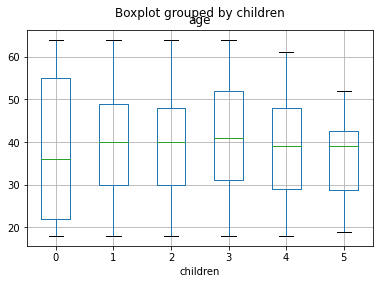

In [18]:
data.boxplot(column='age',by = 'children')

In [19]:
#f you want to use specific elements, you can melt the data like that: First let's take a glace at data.
data_new=data.head()
data_new

,age,sex,bmi,children,smoker,region,charges,bmi_level
0,19,female,27.900,0,yes,southwest,16884.92400,low
1,18,male,33.770,1,no,southeast,1725.55230,high
2,28,male,33.000,3,no,southeast,4449.46200,high
3,33,male,22.705,0,no,northwest,21984.47061,low
4,32,male,28.880,0,no,northwest,3866.85520,low


In [20]:
melted=pd.melt(frame=data_new,id_vars='age',value_vars=['children','bmi_level',])
melted

,age,variable,value
0,19,children,0
1,18,children,1
2,28,children,3
3,33,children,0
4,32,children,0
5,19,bmi_level,low
6,18,bmi_level,high
7,28,bmi_level,high
8,33,bmi_level,low
9,32,bmi_level,low


In [21]:
melted.pivot(index='age',columns='variable',values='value')

variable,bmi_level,children
age,,
18,high,1
19,low,0
28,high,3
32,low,0
33,low,0


In [22]:
data_h=data.head()
data_t=data.tail()
conc_data_row=pd.concat([data_h,data_t],axis=0,ignore_index=True)
conc_data_row

,age,sex,bmi,children,smoker,region,charges,bmi_level
0,19,female,27.900,0,yes,southwest,16884.92400,low
1,18,male,33.770,1,no,southeast,1725.55230,high
2,28,male,33.000,3,no,southeast,4449.46200,high
3,33,male,22.705,0,no,northwest,21984.47061,low
4,32,male,28.880,0,no,northwest,3866.85520,low
5,50,male,30.970,3,no,northwest,10600.54830,high
6,18,female,31.920,0,no,northeast,2205.98080,high
7,18,female,36.850,0,no,southeast,1629.83350,high
8,21,female,25.800,0,no,southwest,2007.94500,low
9,61,female,29.070,0,yes,northwest,29141.36030,low


In [23]:
data_1=data['region'].head()
data_2=data['smoker'].head()
conc_data_col=pd.concat([data_1,data_2],axis=1)
conc_data_col

,region,smoker
0,southwest,yes
1,southeast,no
2,southeast,no
3,northwest,no
4,northwest,no


In [24]:
data.dtypes

age            int64
sex           object
bmi          float64
children       int64
smoker        object
region        object
charges      float64
bmi_level     object
dtype: object

In [25]:
data['charges']=data['charges'].astype('category')
data['bmi_level']=data['bmi_level'].astype('object')
data.dtypes

age             int64
sex            object
bmi           float64
children        int64
smoker         object
region         object
charges      category
bmi_level      object
dtype: object

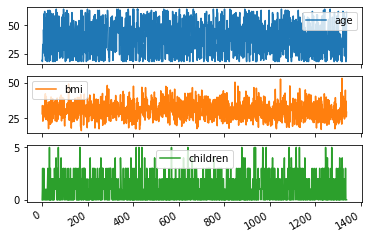

In [28]:
data.plot(subplots=True)
plt.show()

In [29]:
data['charges']=data['charges'].astype('float')

<module 'matplotlib.pyplot' from 'C:\\Users\\elias\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

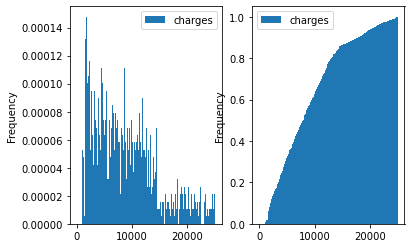

In [32]:
fig, axes = plt.subplots(nrows=1,ncols=2)
data.plot(kind = "hist",y = "charges",bins = 150,range= (0,25000),density = True,ax = axes[0])
data.plot(kind = "hist",y = "charges",bins = 150,range= (0,25000),density = True,ax = axes[1],cumulative = True)
plt.savefig('graph.png')
plt

In [33]:
time_list = ["1997-07-04","1995-10-05"]
print(type(time_list[1]))

datetime_object=pd.to_datetime(time_list)
print(type(datetime_object))

<class 'str'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [34]:
data5=data.head()
date_list=["1997-01-10","1997-02-10","1997-02-15","1997-03-10","1997-03-11"]
datetime_object = pd.to_datetime(date_list)
data5["date"] = datetime_object
data5=data5.set_index('date')
data5

<ipython-input-34-6c3d0a5615e2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5["date"] = datetime_object


,age,sex,bmi,children,smoker,region,charges,bmi_level
date,,,,,,,,
1997-01-10,19,female,27.900,0,yes,southwest,16884.92400,low
1997-02-10,18,male,33.770,1,no,southeast,1725.55230,high
1997-02-15,28,male,33.000,3,no,southeast,4449.46200,high
1997-03-10,33,male,22.705,0,no,northwest,21984.47061,low
1997-03-11,32,male,28.880,0,no,northwest,3866.85520,low


In [35]:
print(data5.loc["1997-03-10"])
print(data5.loc["1997-02-10":"1997-03-16"])

age                 33
sex               male
bmi             22.705
children             0
smoker              no
region       northwest
charges        21984.5
bmi_level          low
Name: 1997-03-10 00:00:00, dtype: object
            age   sex     bmi  children smoker     region      charges  \
date                                                                     
1997-02-10   18  male  33.770         1     no  southeast   1725.55230   
1997-02-15   28  male  33.000         3     no  southeast   4449.46200   
1997-03-10   33  male  22.705         0     no  northwest  21984.47061   
1997-03-11   32  male  28.880         0     no  northwest   3866.85520   

           bmi_level  
date                  
1997-02-10      high  
1997-02-15      high  
1997-03-10       low  
1997-03-11       low  


In [36]:
data5.resample("A").mean()

,age,bmi,children,charges
date,,,,
1997-12-31,26.0,29.251,0.8,9782.252822


In [37]:
data5.resample("M").mean()

,age,bmi,children,charges
date,,,,
1997-01-31,19.0,27.9000,0.0,16884.924000
1997-02-28,23.0,33.3850,2.0,3087.507150
1997-03-31,32.5,25.7925,0.0,12925.662905


In [38]:
data5.resample("M").mean().interpolate("linear")

,age,bmi,children,charges
date,,,,
1997-01-31,19.0,27.9000,0.0,16884.924000
1997-02-28,23.0,33.3850,2.0,3087.507150
1997-03-31,32.5,25.7925,0.0,12925.662905


In [40]:
data.loc[10:1:-1,"age":"children"]

,age,sex,bmi,children
10,25,male,26.220,0
9,60,female,25.840,0
8,37,male,29.830,2
7,37,female,27.740,3
6,46,female,33.440,1
5,31,female,25.740,0
4,32,male,28.880,0
3,33,male,22.705,0
2,28,male,33.000,3
1,18,male,33.770,1


In [41]:
boolean = (data.age<20) & (data.children>0) & (data.bmi>30)
data[boolean]

,age,sex,bmi,children,smoker,region,charges,bmi_level
1,18,male,33.770,1,no,southeast,1725.55230,high
46,18,female,38.665,2,no,northeast,3393.35635,high
57,18,male,31.680,2,yes,southeast,34303.16720,high
168,19,female,31.825,1,no,northwest,2719.27975,high
369,18,male,30.400,3,no,northeast,3481.86800,low
526,19,female,30.590,2,no,northwest,24059.68019,low
564,18,female,32.120,2,no,southeast,2801.25880,high
571,18,female,37.290,1,no,southeast,2219.44510,high
710,18,male,35.200,1,no,southeast,1727.54000,high
960,19,female,39.615,1,no,northwest,2730.10785,high


In [42]:
data.age[data.bmi<18]

28      23
128     32
172     18
232     19
250     18
380     27
410     19
412     26
428     21
680     21
821     26
1029    37
1205    35
1226    38
1286    28
Name: age, dtype: int64

In [43]:
print(data.index.name)
data.index.name="index_name"
data.head()

None


,age,sex,bmi,children,smoker,region,charges,bmi_level
index_name,,,,,,,,
0,19,female,27.900,0,yes,southwest,16884.92400,low
1,18,male,33.770,1,no,southeast,1725.55230,high
2,28,male,33.000,3,no,southeast,4449.46200,high
3,33,male,22.705,0,no,northwest,21984.47061,low
4,32,male,28.880,0,no,northwest,3866.85520,low


In [44]:
data_c=data.copy()
data_c.index=range(1,1339,1)
data_c.head()

,age,sex,bmi,children,smoker,region,charges,bmi_level
1,19,female,27.900,0,yes,southwest,16884.92400,low
2,18,male,33.770,1,no,southeast,1725.55230,high
3,28,male,33.000,3,no,southeast,4449.46200,high
4,33,male,22.705,0,no,northwest,21984.47061,low
5,32,male,28.880,0,no,northwest,3866.85520,low


In [45]:
data6 = data.set_index(["smoker","region"])
data6.head(50)

age     sex     bmi  children      charges bmi_level
smoker region                                                         
yes    southwest   19  female  27.900         0  16884.92400       low
no     southeast   18    male  33.770         1   1725.55230      high
       southeast   28    male  33.000         3   4449.46200      high
       northwest   33    male  22.705         0  21984.47061       low
       northwest   32    male  28.880         0   3866.85520       low
       southeast   31  female  25.740         0   3756.62160       low
       southeast   46  female  33.440         1   8240.58960      high
       northwest   37  female  27.740         3   7281.50560       low
       northeast   37    male  29.830         2   6406.41070       low
       northwest   60  female  25.840         0  28923.13692       low
       northeast   25    male  26.220         0   2721.32080       low
yes    southeast   62  female  26.290         0  27808.72510       low
no     southwest   23    male  34.400         0   1826.84300      high
       southeast   56  female  39.820         0  11090.71780      high
yes    southeast   27    male  42.130         0  39611.75770      high
no     southwest   19    male  24.600         1   1837.23700       low
       northeast   52  female  30.780         1  10797.33620      high
       northeast   23    male  23.845         0   2395.17155       low
       southwest   56    male  40.300         0  10602.38500      high
yes    southwest   30    male  35.300         0  36837.46700      high
no     northeast   60  female  36.005         0  13228.84695      high
       southwest   30  female  32.400         1   4149.73600      high
       southeast   18    male  34.100         0   1137.01100      high
yes    northeast   34  female  31.920         1  37701.87680      high
no     northwest   37    male  28.025         2   6203.90175       low
       southeast   59  female  27.720         3  14001.13380       low
       northeast   63  female  23.085         0  14451.83515       low
       northwest   55  female  32.775         2  12268.63225      high
       northwest   23    male  17.385         1   2775.19215       low
yes    southwest   31    male  36.300         2  38711.00000      high
       southwest   22    male  35.600         0  35585.57600      high
no     northeast   18  female  26.315         0   2198.18985       low
       southwest   19  female  28.600         5   4687.79700       low
       northwest   63    male  28.310         0  13770.09790       low
yes    southwest   28    male  36.400         1  51194.55914      high
no     northwest   19    male  20.425         0   1625.43375       low
       northwest   62  female  32.965         3  15612.19335      high
       southwest   26    male  20.800         0   2302.30000       low
yes    northeast   35    male  36.670         1  39774.27630      high
       southwest   60    male  39.900         0  48173.36100      high
no     northeast   24  female  26.600         0   3046.06200       low
       southeast   31  female  36.630         2   4949.75870      high
       southeast   41    male  21.780         1   6272.47720       low
       southeast   37  female  30.800         2   6313.75900      high
       northeast   38    male  37.050         1   6079.67150      high
       southwest   55    male  37.300         0  20630.28351      high
       northeast   18  female  38.665         2   3393.35635      high
       northwest   28  female  34.770         0   3556.92230      high
       southeast   60  female  24.530         0  12629.89670       low
yes    southeast   36    male  35.200         1  38709.17600      high

In [46]:
data.groupby("region").mean()

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377
